Import Required Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Retrieve Datasets as Dataframes

In [23]:
df_2024 = pd.read_csv('Dataset Generation (2024) (Responses) - Form Responses 1.csv')
df_fardina = pd.read_csv('Dataset Generation (Fardina) (Responses) - Form Responses 1.csv')
df_max = pd.read_csv('Dataset Generation (Max) (Responses) - Form Responses 1.csv')

In [24]:
df_2024.drop_duplicates(inplace=True)
df_fardina.drop_duplicates(inplace=True)
df_max.drop_duplicates(inplace=True)

df_2024.dropna(inplace=True)
df_fardina.dropna(inplace=True)
df_max.dropna(inplace=True)

short_cols = ['Time', 'Year', 'Age', 'Politics of Parents', 'Politics of Self', 'Spirituality', 'Gender', 'Q1: Ignored Knee Pain', 'Q2: Rejected Aisle Walk', 'Q3: Trust Fund Split 50/50', 'Q4: Schooling Seperate Finances', 'Q5: Lost Cat, No Reward', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q10: Expensive School, Cheap Career', 'Q11: Ex Wedding Invitation Revoked', 'Q12: Relatives Unapprove Wedding', 'Q13: Pregnant Wife, No Drinks', 'Q14: Rejected Dyed Hair']  

df_fardina_non_priming = pd.DataFrame()
df_fardina_non_priming[df_fardina.columns.to_list()[0:7] + df_fardina.columns.to_list()[8:]] = df_fardina[df_fardina.columns.to_list()[0:7] + df_fardina.columns.to_list()[8:]]

df_fardina['How old are you?'] = df_fardina['How old are you?'].apply(func=lambda x: int(x) if x != '50+' else x)
df_max['How old are you?'] = df_max['How old are you?'].apply(func=lambda x: int(x) if x != '50+' else x)

fardina_cols = df_fardina_non_priming.columns.to_list()
max_cols = df_max.columns.to_list()
fardina_col_mapping = dict(zip(fardina_cols, short_cols))
max_col_mapping = dict(zip(max_cols, short_cols))

df_fardina_final = df_fardina_non_priming.rename(columns=fardina_col_mapping)
df_max_final = df_max.rename(columns=max_col_mapping)

df_2023_final = pd.concat([df_fardina_final, df_max_final])
df_2023_final['Gender'] = df_2023_final['Gender'].apply(func=lambda s: s.replace('Famale', 'Female') if isinstance(s, str) else s)

str_replace = lambda s: s.replace('religious', 'spiritual') if isinstance(s, str) else s
df_2024['How would you rate your religiousness?'] = df_2024['How would you rate your religiousness?'].apply(func=str_replace)
df_2024['How old are you?'] = df_2024['How old are you?'].apply(func=lambda x: int(x) if x != '50+' else x)

d2024_cols = df_2024.columns.to_list()
d2024_col_mapping = dict(zip(d2024_cols, short_cols))
df_2024_final = df_2024.rename(columns=d2024_col_mapping)

df_all = pd.concat([df_2023_final, df_2024_final])
df_all['Year'] = df_all['Year'].apply(func=lambda s: s.replace('Other', 'Graduate Student'))

df_fardina_priming_final = df_fardina_final.copy()
df_fardina_priming_final['Compassionate'] = df_fardina['Would you describe yourself as compassionate?']


Cluster 0:
["My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?", "My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd 

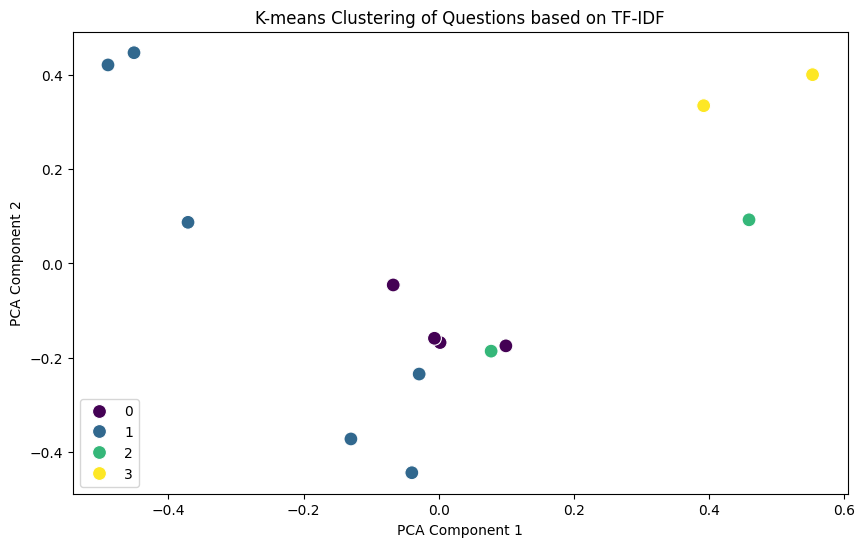

In [25]:
# Sample list of questions as they appear in your data (e.g., Q1, Q2, ..., Q14)
questions = max_cols[7:]

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(questions)

# Step 2: Apply K-Means Clustering
num_clusters = 4  # Adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Step 3: Analyze the clusters
clusters = kmeans.labels_

# Create a DataFrame with the questions and their assigned clusters
df_clusters = pd.DataFrame({'Question': questions, 'Cluster': clusters})

# Display the clustered questions
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df_clusters[df_clusters['Cluster'] == cluster]['Question'].tolist())


# Visualize the TF-IDF vectors in 2D using PCA for better understanding
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_tfidf[:, 0], y=reduced_tfidf[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('K-means Clustering of Questions based on TF-IDF')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

/var/folders/rz/twm3nfx14_379nlt_mj5qb3w0000gn/T/ipykernel_56183/2707131864.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(k_values, inertia, 'bo-', color='blue', marker='o')
/var/folders/rz/twm3nfx14_379nlt_mj5qb3w0000gn/T/ipykernel_56183/2707131864.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_values, inertia, 'bo-', color='blue', marker='o')


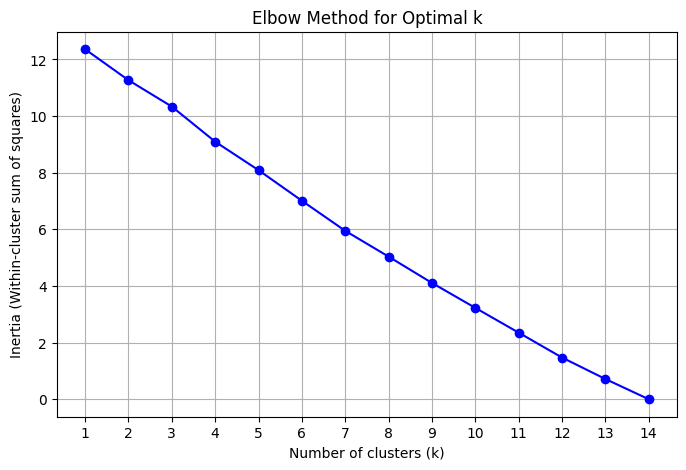

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have a TF-IDF matrix or any other feature matrix (e.g., question_vectors)
X = tfidf_matrix  # Replace this with your actual data matrix

# Step 1: Define range of k values to test
k_values = range(1, 15)  # Testing k from 1 to 10

# Step 2: Fit K-means models for each k and store the inertia (WCSS) values
inertia = []  # List to store the WCSS (inertia) for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Append the inertia (within-cluster sum of squares)

# Step 3: Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-', color='blue', marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [27]:
df_clusters["Mapped Question"] = df_clusters["Question"].apply(func=lambda s: max_col_mapping[s])

In [28]:
df_clusters

,Question,Cluster,Mapped Question
0,My girlfriend is a doctor. Lately she's been c...,0,Q1: Ignored Knee Pain
1,My daughter is getting married soon. I only le...,2,Q2: Rejected Aisle Walk
2,I'm a trust fund kid; I get a healthy 'allowan...,1,Q3: Trust Fund Split 50/50
3,"My wife and I have separate finances, but I pa...",3,Q4: Schooling Seperate Finances
4,I saw a poster for a lost cat advertising a 50...,1,"Q5: Lost Cat, No Reward"
5,My sister's nine year old daughter is poorly b...,0,Q6: Surprisig Child Drop-Off
6,My parents want us to come out for their anniv...,0,Q7: Business Class Over Kids
7,"I'm a single mom with four kids, one of whom h...",1,"Q8: Single Parent, Four Kids"
8,I have a child with a mother who never wanted ...,1,Q9: Split Spouse Child Support
9,One of my children wants to go to an expensive...,3,"Q10: Expensive School, Cheap Career"


In [29]:
# Display the clustered mapped questions
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df_clusters[df_clusters['Cluster'] == cluster]['Mapped Question'].tolist())


Cluster 0:
['Q1: Ignored Knee Pain', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q14: Rejected Dyed Hair']

Cluster 1:
['Q3: Trust Fund Split 50/50', 'Q5: Lost Cat, No Reward', 'Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q11: Ex Wedding Invitation Revoked', 'Q12: Relatives Unapprove Wedding']

Cluster 2:
['Q2: Rejected Aisle Walk', 'Q13: Pregnant Wife, No Drinks']

Cluster 3:
['Q4: Schooling Seperate Finances', 'Q10: Expensive School, Cheap Career']



Cluster 0:
['Q1: Ignored Knee Pain', 'Q2: Rejected Aisle Walk', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q11: Ex Wedding Invitation Revoked', 'Q14: Rejected Dyed Hair']

Cluster 1:
['Q4: Schooling Seperate Finances', 'Q10: Expensive School, Cheap Career', 'Q13: Pregnant Wife, No Drinks']

Cluster 2:
['Q3: Trust Fund Split 50/50', 'Q5: Lost Cat, No Reward', 'Q12: Relatives Unapprove Wedding']

Cluster 3:
['Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support']


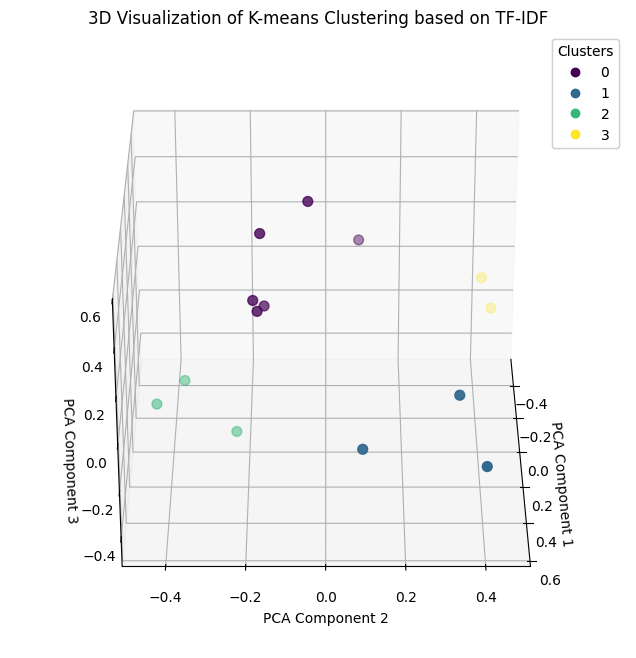

In [36]:
from mpl_toolkits.mplot3d import Axes3D

# Sample list of questions as they appear in your data (e.g., Q1, Q2, ..., Q14)
questions = max_cols[7:]

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(questions)

# Visualize the TF-IDF vectors in 2D using PCA for better understanding
pca = PCA(n_components=3)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

# Step 2: Apply K-Means Clustering
num_clusters = 4  # Adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reduced_tfidf)

# Step 3: Analyze the clusters
clusters = kmeans.labels_

# Create a DataFrame with the questions and their assigned clusters
df_clusters2 = pd.DataFrame({'Question': questions, 
                            'Cluster': clusters,
                            'PCA1': reduced_tfidf[:, 0], 
                            'PCA2': reduced_tfidf[:, 1], 
                            'PCA3': reduced_tfidf[:, 2]})

df_clusters2["Mapped Question"] = df_clusters2["Question"].apply(func=lambda s: max_col_mapping[s])

d2023_cluster_lst = []
# Display the clustered questions
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df_clusters2[df_clusters2['Cluster'] == cluster]['Mapped Question'].tolist())
    d2023_cluster_lst.append(df_clusters2[df_clusters2['Cluster'] == cluster]['Mapped Question'].tolist())


# Step 4: Visualize the 3D K-means clustering
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(df_clusters2['PCA1'], df_clusters2['PCA2'], df_clusters2['PCA3'], 
                     c=df_clusters2['Cluster'], cmap='viridis', s=50)

# Set labels and title
ax.set_title('3D Visualization of K-means Clustering based on TF-IDF')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Create a legend with cluster labels
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.view_init(azim=0) 

plt.show()


Cluster 0:
['Q1: Ignored Knee Pain', 'Q4: Schooling Seperate Finances', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q10: Expensive School, Cheap Career']

Cluster 1:
['Q3: Trust Fund Split 50/50', 'Q5: Lost Cat, No Reward', 'Q12: Relatives Unapprove Wedding']

Cluster 2:
['Q2: Rejected Aisle Walk', 'Q13: Pregnant Wife, No Drinks', 'Q14: Rejected Dyed Hair']

Cluster 3:
['Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q11: Ex Wedding Invitation Revoked']


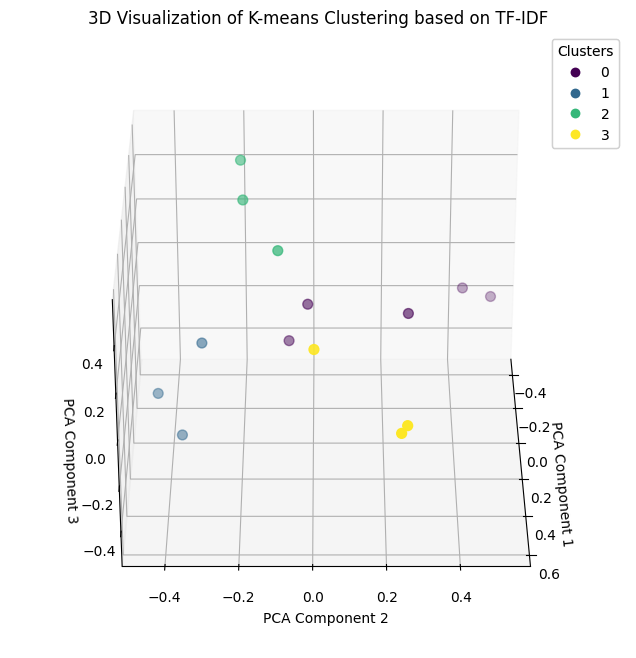

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# Sample list of questions as they appear in your data (e.g., Q1, Q2, ..., Q14)
questions = d2024_cols[7:]

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(questions)

# Visualize the TF-IDF vectors in 2D using PCA for better understanding
pca = PCA(n_components=3)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

# Step 2: Apply K-Means Clustering
num_clusters = 4  # Adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reduced_tfidf)

# Step 3: Analyze the clusters
clusters = kmeans.labels_

# Create a DataFrame with the questions and their assigned clusters
df_clusters2 = pd.DataFrame({'Question': questions, 
                            'Cluster': clusters,
                            'PCA1': reduced_tfidf[:, 0], 
                            'PCA2': reduced_tfidf[:, 1], 
                            'PCA3': reduced_tfidf[:, 2]})

df_clusters2["Mapped Question"] = df_clusters2["Question"].apply(func=lambda s: d2024_col_mapping[s])

d2024_cluster_lst = []
# Display the clustered questions
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df_clusters2[df_clusters2['Cluster'] == cluster]['Mapped Question'].tolist())
    d2024_cluster_lst.append(df_clusters2[df_clusters2['Cluster'] == cluster]['Mapped Question'].tolist())


# Step 4: Visualize the 3D K-means clustering
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(df_clusters2['PCA1'], df_clusters2['PCA2'], df_clusters2['PCA3'], 
                     c=df_clusters2['Cluster'], cmap='viridis', s=50)

# Set labels and title
ax.set_title('3D Visualization of K-means Clustering based on TF-IDF')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Create a legend with cluster labels
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.view_init(azim=0) 

plt.show()

In [35]:
d2024_cluster_lst

[['Q1: Ignored Knee Pain',
  'Q4: Schooling Seperate Finances',
  'Q6: Surprisig Child Drop-Off',
  'Q7: Business Class Over Kids',
  'Q10: Expensive School, Cheap Career'],
 ['Q3: Trust Fund Split 50/50',
  'Q5: Lost Cat, No Reward',
  'Q12: Relatives Unapprove Wedding'],
 ['Q2: Rejected Aisle Walk',
  'Q13: Pregnant Wife, No Drinks',
  'Q14: Rejected Dyed Hair'],
 ['Q8: Single Parent, Four Kids',
  'Q9: Split Spouse Child Support',
  'Q11: Ex Wedding Invitation Revoked']]

In [39]:
temp = d2023_cluster_lst[1]
d2023_cluster_lst[1] = d2023_cluster_lst[2]
d2023_cluster_lst[2] = temp

d2023_cluster_lst

[['Q1: Ignored Knee Pain',
  'Q2: Rejected Aisle Walk',
  'Q6: Surprisig Child Drop-Off',
  'Q7: Business Class Over Kids',
  'Q11: Ex Wedding Invitation Revoked',
  'Q14: Rejected Dyed Hair'],
 ['Q3: Trust Fund Split 50/50',
  'Q5: Lost Cat, No Reward',
  'Q12: Relatives Unapprove Wedding'],
 ['Q4: Schooling Seperate Finances',
  'Q10: Expensive School, Cheap Career',
  'Q13: Pregnant Wife, No Drinks'],
 ['Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support']]

In [40]:
res = []
for i in range(0,4):
    set1 = set(d2024_cluster_lst[i])
    set2 = set(d2023_cluster_lst[i])
    res.append(set1.intersection(set2))

res


[{'Q1: Ignored Knee Pain',
  'Q6: Surprisig Child Drop-Off',
  'Q7: Business Class Over Kids'},
 {'Q12: Relatives Unapprove Wedding',
  'Q3: Trust Fund Split 50/50',
  'Q5: Lost Cat, No Reward'},
 {'Q13: Pregnant Wife, No Drinks'},
 {'Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support'}]